In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [155]:
df = pd.read_csv("../Data/Train/df.csv")

In [156]:
df.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,Region
0,1.39651,1.34951,0.94143,0.66557,0.41978,7.587,0.0
1,1.30232,1.40223,0.94784,0.62877,0.14145,7.561,0.0
2,1.32548,1.36058,0.87464,0.64938,0.48357,7.527,0.0
3,1.45900,1.33095,0.88521,0.66973,0.36503,7.522,0.0
4,1.32629,1.32261,0.90563,0.63297,0.32957,7.427,1.0


In [157]:
X = df[['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Region']]
y = df['Score']


print(X.isnull().sum())
print(y.isnull().sum())


X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


GDP                 0
Family              0
Life Expectancy     0
Freedom             0
Trust               1
Region             16
dtype: int64
0


/tmp/ipykernel_18429/2850157958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [160]:
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 0.320253672962502
R^2: 0.7367153832847613


In [161]:
print("Coeficientes:", model.coef_)


Coeficientes: [ 0.86012504  0.65551671  0.70705375  1.52741381  0.95757269 -0.08271611]


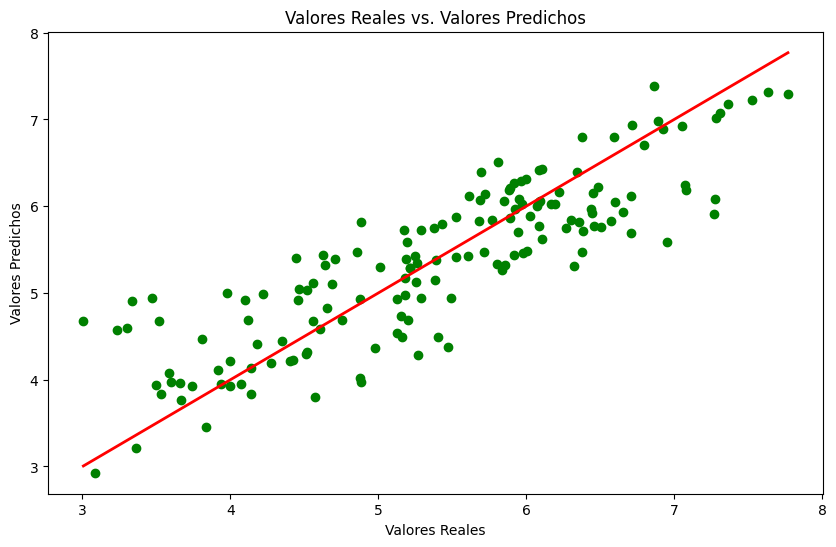

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')

plt.show()

---

## with Age and Region

---

In [15]:
data_2015 = pd.read_csv("../Data/Train/data_2015.csv")
data_2016 = pd.read_csv("../Data/Train/data_2016.csv")
data_2017 = pd.read_csv("../Data/Train/data_2017.csv")
data_2018 = pd.read_csv("../Data/Train/data_2018.csv")
data_2019 = pd.read_csv("../Data/Train/data_2019.csv")

In [16]:
data_2015["Age"] = 2015
data_2016["Age"] = 2016
data_2018["Age"] = 2018
data_2019["Age"] = 2019

In [17]:
data_2015.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,Region,Age
0,1.39651,1.34951,0.94143,0.66557,0.41978,7.587,0,2015
1,1.30232,1.40223,0.94784,0.62877,0.14145,7.561,0,2015
2,1.32548,1.36058,0.87464,0.64938,0.48357,7.527,0,2015
3,1.45900,1.33095,0.88521,0.66973,0.36503,7.522,0,2015
4,1.32629,1.32261,0.90563,0.63297,0.32957,7.427,1,2015


In [18]:
df_ages = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019])

In [19]:
df_ages.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,Region,Age
0,1.39651,1.34951,0.94143,0.66557,0.41978,7.587,0.0,2015.0
1,1.30232,1.40223,0.94784,0.62877,0.14145,7.561,0.0,2015.0
2,1.32548,1.36058,0.87464,0.64938,0.48357,7.527,0.0,2015.0
3,1.45900,1.33095,0.88521,0.66973,0.36503,7.522,0.0,2015.0
4,1.32629,1.32261,0.90563,0.63297,0.32957,7.427,1.0,2015.0


In [20]:
df_ages.Age.value_counts()

Age
2015.0    158
2016.0    157
2018.0    156
2019.0    156
Name: count, dtype: int64

In [21]:
# Replace any infinities with NaN
df_ages['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Optional: you could choose to either drop or impute these NaNs
df_ages.dropna(subset=['Age'], inplace=True)  # Remove rows with NaN if you decide to clean the data this way
# df_ages['Age'].fillna(0, inplace=True)  # or impute with a value like 0 or the median

# Try converting again
df_ages['Age'] = df_ages['Age'].astype(int)

In [22]:
df_ages.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,Region,Age
0,1.39651,1.34951,0.94143,0.66557,0.41978,7.587,0.0,2015
1,1.30232,1.40223,0.94784,0.62877,0.14145,7.561,0.0,2015
2,1.32548,1.36058,0.87464,0.64938,0.48357,7.527,0.0,2015
3,1.45900,1.33095,0.88521,0.66973,0.36503,7.522,0.0,2015
4,1.32629,1.32261,0.90563,0.63297,0.32957,7.427,1.0,2015


In [23]:
df_ages.Age.value_counts()

Age
2015    158
2016    157
2018    156
2019    156
Name: count, dtype: int64

In [24]:
df_ages.Age.isnull().value_counts()

Age
False    627
Name: count, dtype: int64

In [25]:
df_ages.shape

(627, 8)

In [46]:
df_ages.keys()

Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region', 'Age'],
      dtype='object')

In [26]:
df_ages.to_csv("../Data/Train/df_ages.csv", index=False)

---
## 🤓


In [171]:
X = df_ages[['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Region', 'Age']]
y = df_ages['Score']

# Check for and handle any NaN values
if X.isnull().any().any() or y.isnull().any():
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)


/tmp/ipykernel_18429/3622275699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


In [173]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [174]:
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y los valores de R-cuadrado (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("R-cuadrado:", r2)


Error Cuadrático Medio: 0.25310105796505267
R-cuadrado: 0.7631518188635866


In [175]:
print("Coeficientes:", model.coef_)


Coeficientes: [ 1.00900834  0.85869197  0.53044729  1.10551664  0.70722001 -0.08148052
 -0.07065074]


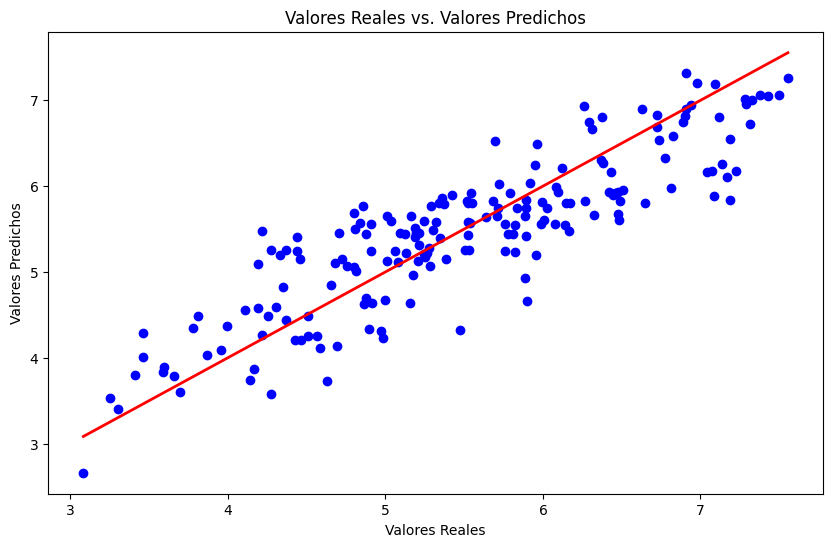

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

---

---

In [178]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.6)  # ajustar el parámetro alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - R^2:", r2_ridge)

Ridge Regression - MSE: 0.2556582224623788
Ridge Regression - R^2: 0.7607588626075843


In [179]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # ajustar el parámetro alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - MSE:", mse_lasso)
print("Lasso Regression - R^2:", r2_lasso)


Lasso Regression - MSE: 0.516537732349484
Lasso Regression - R^2: 0.5166317226054615


In [180]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.6, l1_ratio=0.3)  #  ajustar los parámetros alpha y l1_ratio
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net - MSE:", mse_elastic_net)
print("Elastic Net - R^2:", r2_elastic_net)


Elastic Net - MSE: 0.6713139452354392
Elastic Net - R^2: 0.3717944595771794


In [183]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_model.fit(X_train, y_train)
y_pred_poly = polynomial_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression - MSE:", mse_poly)
print("Polynomial Regression - R^2:", r2_poly)


Polynomial Regression - MSE: 0.22916580947967075
Polynomial Regression - R^2: 0.7855500660870083


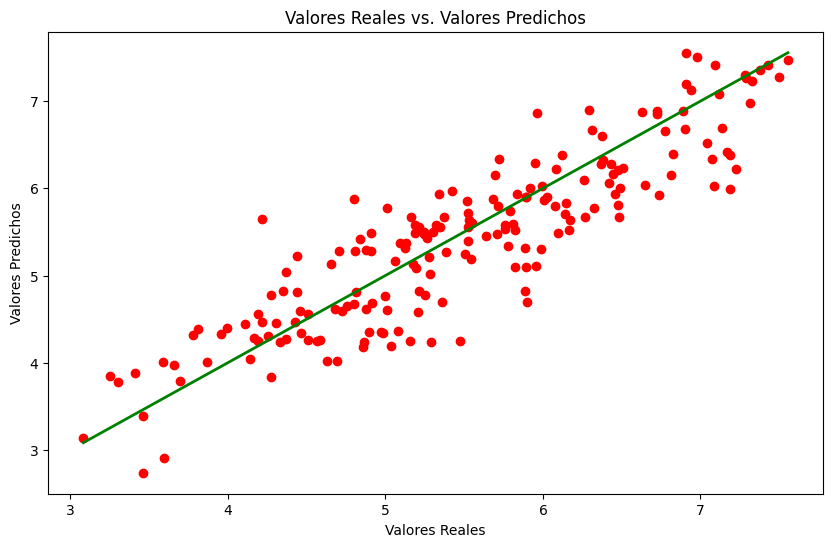

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

In [182]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')  #'poly', 'rbf', 'linear
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression - MSE:", mse_svr)
print("Support Vector Regression - R^2:", r2_svr)
# No corre

Support Vector Regression - MSE: 0.35833957257400545
Support Vector Regression - R^2: 0.6646711923066249


---

## Second Age and Region T

---

In [27]:
df_T = df_ages.copy()

In [41]:
Region_number = {'Western Europe': 0,
 'North America': 1,
 'Australia and New Zealand': 2,
 'Middle East and Northern Africa': 3,
 'Latin America and Caribbean': 4,
 'Southeastern Asia': 5,
 'Central and Eastern Europe': 6,
 'Eastern Asia': 7,
 'Sub-Saharan Africa': 8,
 'Southern Asia': 9}

In [35]:
def Create_new_years_columns(df):
    df["2015"] = (df["Age"] == 2015).astype(int)
    df["2016"] = (df["Age"] == 2016).astype(int)
    df["2017"] = (df["Age"] == 2017).astype(int)
    df["2018"] = (df["Age"] == 2018).astype(int)
    df["2019"] = (df["Age"] == 2019).astype(int)
    df.drop(columns=["Age"], inplace=True)
    return df


In [42]:
def convert_region_to_columns(df):
    region_dict = Region_number
    # Invertir el diccionario para hacer el mapeo de número a nombre
    number_to_region = {v: k for k, v in region_dict.items()}
    
    # Crear una nueva columna 'Region_name' con los nombres de las regiones
    df['Region_name'] = df['Region'].map(number_to_region)
    
    # Crear columnas booleanas para cada región
    for region in region_dict.keys():
        df[region] = (df['Region_name'] == region).astype(int)
    
    # Eliminar las columnas 'Region' y 'Region_name'
    df.drop(columns=['Region', 'Region_name'], inplace=True)
    
    return df

In [36]:
df_T = Create_new_years_columns(df_T)

In [37]:
df_T.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,Region,2015,2016,2017,2018,2019
0,1.39651,1.34951,0.94143,0.66557,0.41978,7.587,0.0,1,0,0,0,0
1,1.30232,1.40223,0.94784,0.62877,0.14145,7.561,0.0,1,0,0,0,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,7.527,0.0,1,0,0,0,0
3,1.45900,1.33095,0.88521,0.66973,0.36503,7.522,0.0,1,0,0,0,0
4,1.32629,1.32261,0.90563,0.63297,0.32957,7.427,1.0,1,0,0,0,0


In [43]:
df_T = convert_region_to_columns(df_T)

In [44]:
df_T.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,2015,2016,2017,2018,...,Western Europe,North America,Australia and New Zealand,Middle East and Northern Africa,Latin America and Caribbean,Southeastern Asia,Central and Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
0,1.39651,1.34951,0.94143,0.66557,0.41978,7.587,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.30232,1.40223,0.94784,0.62877,0.14145,7.561,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,7.527,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.45900,1.33095,0.88521,0.66973,0.36503,7.522,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.32629,1.32261,0.90563,0.63297,0.32957,7.427,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
df_T.keys()

Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score', '2015',
       '2016', '2017', '2018', '2019', 'Western Europe', 'North America',
       'Australia and New Zealand', 'Middle East and Northern Africa',
       'Latin America and Caribbean', 'Southeastern Asia',
       'Central and Eastern Europe', 'Eastern Asia', 'Sub-Saharan Africa',
       'Southern Asia'],
      dtype='object')

In [96]:
X = df_T[['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', '2015', '2016', '2017', '2018', '2019',
          'Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa',
          'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
          'Sub-Saharan Africa', 'Southern Asia']]
y = df_T['Score']

# Verificar y manejar valores NaN
if X.isnull().any().any() or y.isnull().any():
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("R-cuadrado:", r2)


Error Cuadrático Medio: 0.23834791323906096
R-cuadrado: 0.8087997749353245


/tmp/ipykernel_1338/1160147831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


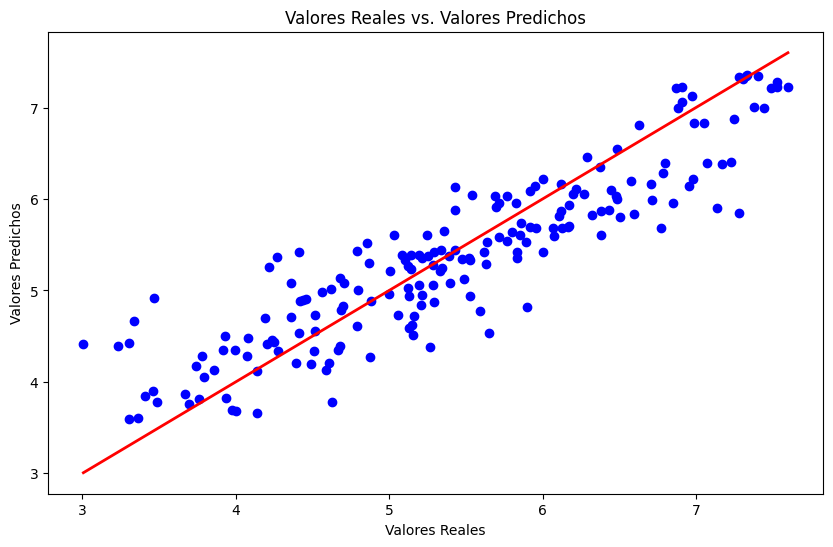

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

In [98]:
joblib.dump(model, '../Model/linear_regression_model.pkl')

['../Model/linear_regression_model.pkl']

In [99]:
df_T.to_csv("../Data/Train/df_T.csv", index=False)

In [ ]:
['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', '2015', '2016', '2017', '2018', '2019',
          'Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa',
          'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
          'Sub-Saharan Africa', 'Southern Asia', 'Score']

In [111]:
from sklearn.ensemble import RandomForestRegressor



X = df_T[['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', '2015', '2016', '2017', '2018', '2019',
          'Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa',
          'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
          'Sub-Saharan Africa', 'Southern Asia']]
y = df_T['Score']

if X.isnull().any().any() or y.isnull().any():
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("R-cuadrado:", r2)


Error Cuadrático Medio: 0.2289073364783069
R-cuadrado: 0.8226800655788793


/tmp/ipykernel_1338/1476705820.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
